# Importing the required library

In [280]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")

# Importing Data

In [281]:
#Load the Excel file and Giving the particular sheet name for to read the data from it
df = pd.read_excel("Election_Data.xlsx", sheet_name='Election_Dataset_Two Classes')

# Exploratory Data Analysis

In [282]:
#Check the top few records

df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [283]:
#Shape of the Data
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1525 
no. of columns:  10


Data Type of Data Features

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


Checking for possible columns which can be represented as categorical

In [285]:
df['vote'].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [286]:
df['economic.cond.national'].value_counts()

3    607
4    542
2    257
5     82
1     37
Name: economic.cond.national, dtype: int64

In [287]:
df['economic.cond.household'].value_counts()

3    648
4    440
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64

In [288]:
df['Blair'].value_counts()

4    836
2    438
5    153
1     97
3      1
Name: Blair, dtype: int64

In [289]:
df['Hague'].value_counts()

2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64

In [290]:
df['Europe'].value_counts()

11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: Europe, dtype: int64

In [291]:
df['political.knowledge'].value_counts()

2    782
0    455
3    250
1     38
Name: political.knowledge, dtype: int64

In [292]:
df['gender'].value_counts()

female    812
male      713
Name: gender, dtype: int64

In [293]:
df['gender'].replace(['female','male'],[0,1],inplace=True)

In [294]:
#Change the data types 8 features

In [295]:
dog=["vote","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge","gender"]

In [296]:
for i in dog:
    df[i]=df[i].astype("object")

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   object
 4   economic.cond.household  1525 non-null   object
 5   Blair                    1525 non-null   object
 6   Hague                    1525 non-null   object
 7   Europe                   1525 non-null   object
 8   political.knowledge      1525 non-null   object
 9   gender                   1525 non-null   object
dtypes: int64(2), object(8)
memory usage: 119.3+ KB


In [298]:
#Droping the first column as it is just representing Number of people
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   object
 3   economic.cond.household  1525 non-null   object
 4   Blair                    1525 non-null   object
 5   Hague                    1525 non-null   object
 6   Europe                   1525 non-null   object
 7   political.knowledge      1525 non-null   object
 8   gender                   1525 non-null   object
dtypes: int64(1), object(8)
memory usage: 107.4+ KB


Making different list for categorical columns and numercal columns

In [300]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)


['vote', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']
['age']


Describe for numerical and categorical columns

In [301]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0


In [302]:
df[cat].describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
economic.cond.national,1525,5,3,607
economic.cond.household,1525,5,3,648
Blair,1525,5,4,836
Hague,1525,5,2,624
Europe,1525,11,11,338
political.knowledge,1525,4,2,782
gender,1525,2,0,812


Unique values for categorical variables

In [303]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


ECONOMIC.COND.NATIONAL :  5
1     37
5     82
2    257
4    542
3    607
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
1     65
5     92
2    280
4    440
3    648
Name: economic.cond.household, dtype: int64


BLAIR :  5
3      1
1     97
5    153
2    438
4    836
Name: Blair, dtype: int64


HAGUE :  5
3     37
5     73
1    233
4    558
2    624
Name: Hague, dtype: int64


EUROPE :  11
2      79
7      86
10    101
1     109
9     111
8     112
5     124
4     127
3     129
6     209
11    338
Name: Europe, dtype: int64


POLITICAL.KNOWLEDGE :  4
1     38
3    250
0    455
2    782
Name: political.knowledge, dtype: int64


GENDER :  2
1    713
0    812
Name: gender, dtype: int64




In [304]:
# Are there any missing values ?
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

No Null Values present in the dataset

In [305]:
## Are there any duplicate records

# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,1
626,Labour,39,3,4,4,2,5,2,1
870,Labour,38,2,4,2,2,4,3,1
983,Conservative,74,4,3,2,4,8,2,0
1154,Conservative,53,3,4,2,2,6,0,0
1236,Labour,36,3,3,2,2,6,2,0
1244,Labour,29,4,4,4,2,2,2,0
1438,Labour,40,4,3,4,2,2,2,1


These Duplicate values are necessary as it represents different voters 

In [306]:
## Let's rename columns to remove space before we impute
df.rename(columns ={"economic.cond.national":"National_Cond","economic.cond.household":"Household_cond","political.knowledge":"political_knowledge"},inplace=True)

In [307]:
dog1=["vote","National_Cond","Household_cond","Blair","Hague","Europe","political_knowledge","gender"]

In [308]:
for i in dog1:
    df[i]=df[i].astype("object")

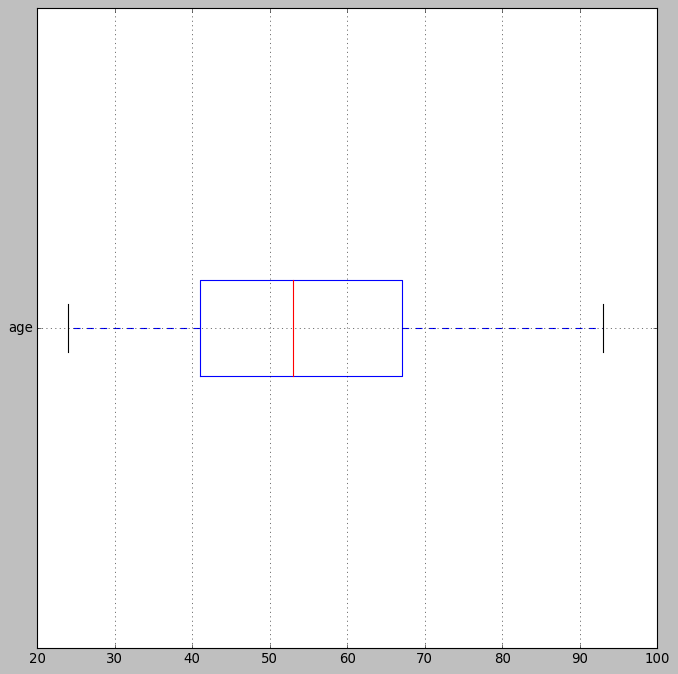

In [309]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.show()

There are no outliers present in the dataset

# Univariant Analysis

Text(0.5, 1.0, 'age Distribution')

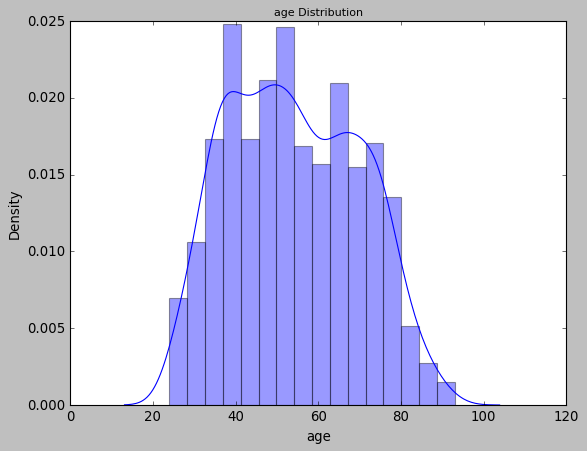

In [310]:
a = sns.distplot(df['age'])
a.set_title("age Distribution",fontsize=10)



# Bivariate and Multivariate Analysis

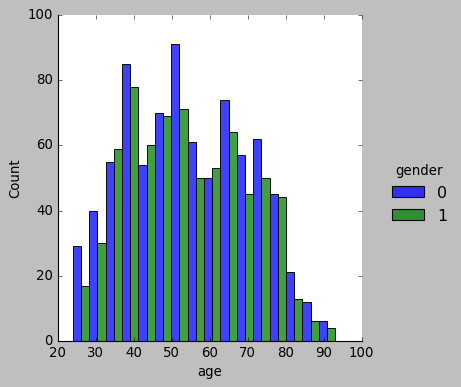

In [311]:
sns.displot(df, x="age", hue="gender",multiple="dodge")

<AxesSubplot:xlabel='gender', ylabel='age'>

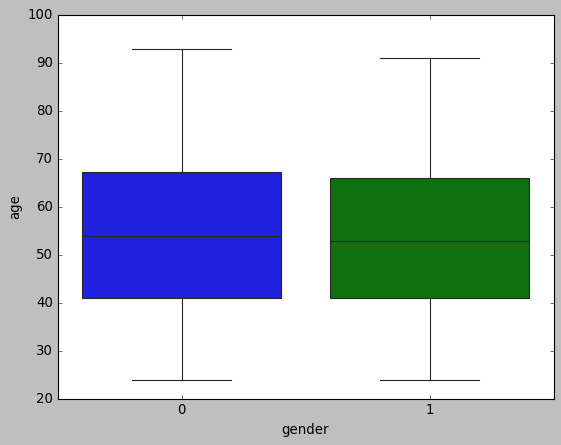

In [312]:
sns.boxplot(df["gender"],df['age'])

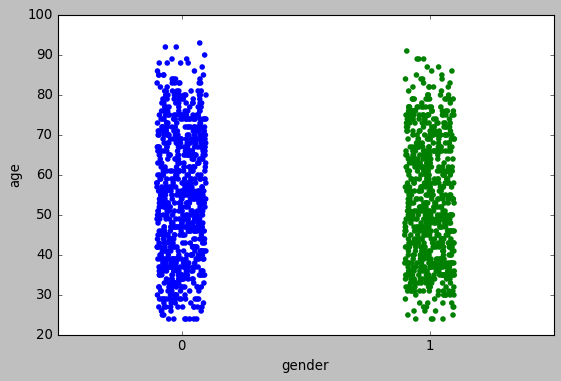

In [313]:
plt.figure(figsize=(8,5))
sns.stripplot(df["gender"], df['age'], jitter=True) 
plt.show()

# Correlation Plot

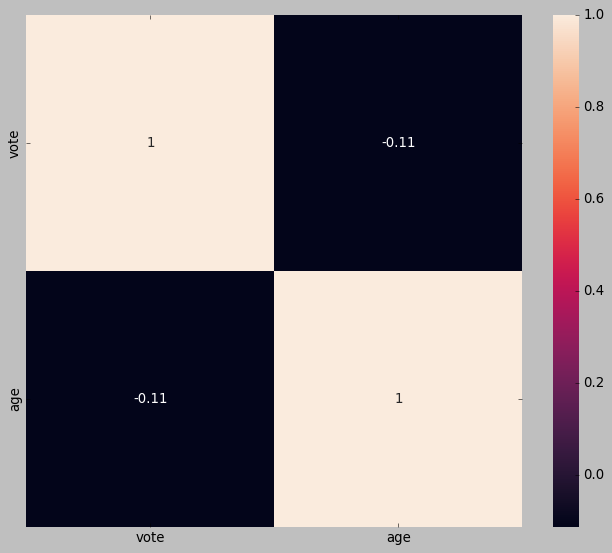

In [469]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

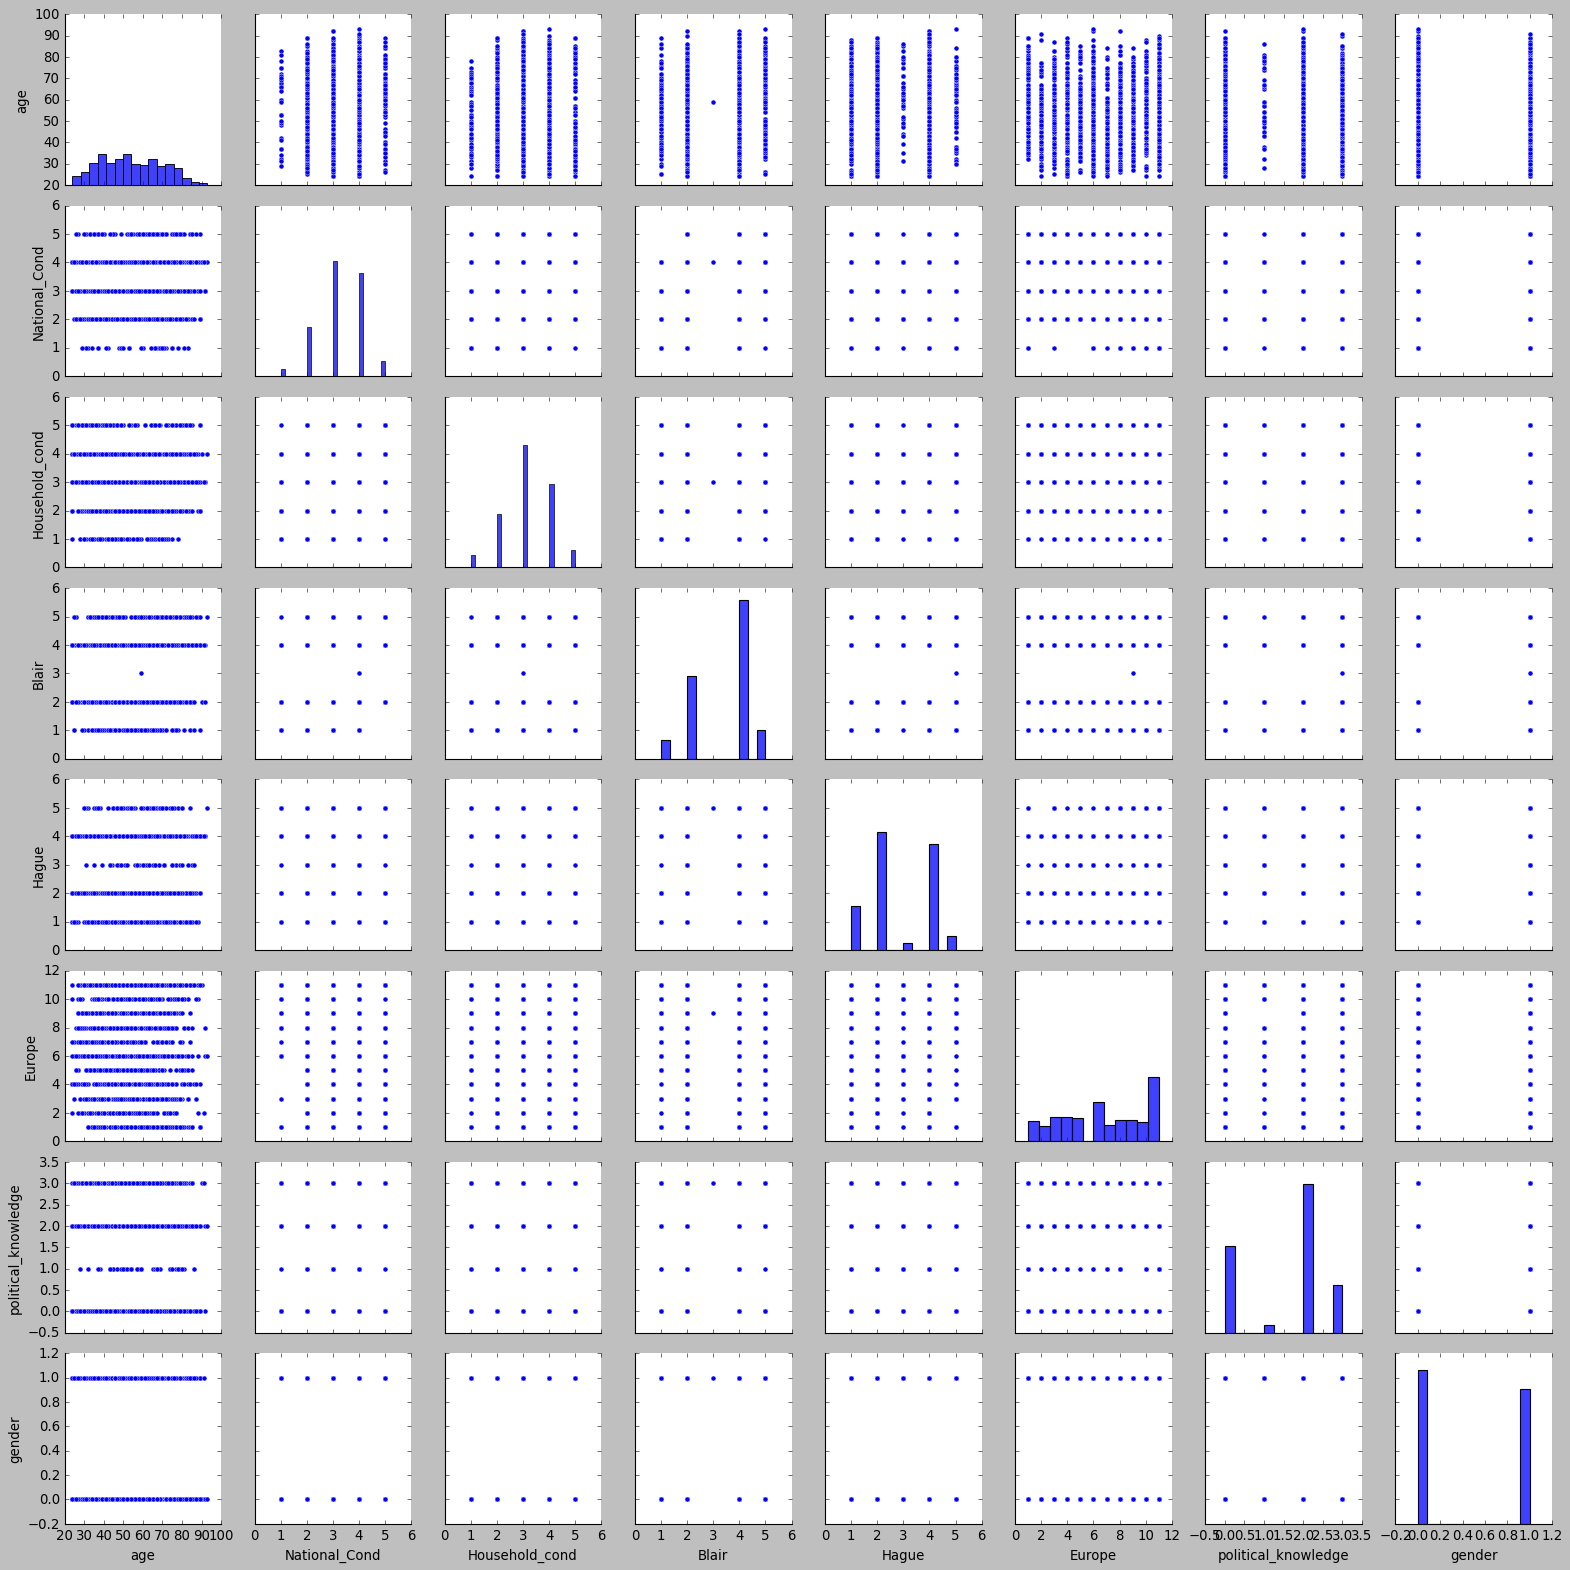

In [315]:
sns.pairplot(df)


# Train-Test Split

In [316]:
df.columns

Index(['vote', 'age', 'National_Cond', 'Household_cond', 'Blair', 'Hague',
       'Europe', 'political_knowledge', 'gender'],
      dtype='object')

In [317]:
# Copy all the predictor variables into X dataframe
X = df.drop('vote', axis=1)

# Copy target into the y dataframe.  
y = df['vote']

In [318]:
X.head()

,age,National_Cond,Household_cond,Blair,Hague,Europe,political_knowledge,gender
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [319]:
y.head()

0    Labour
1    Labour
2    Labour
3    Labour
4    Labour
Name: vote, dtype: object

In [320]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# Naive Bayes Model

In [321]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [322]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [323]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8331771321462043
[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

Conservative       0.74      0.72      0.73       332
      Labour       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [324]:
y_test.value_counts()

Labour          328
Conservative    130
Name: vote, dtype: int64

In [325]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8253275109170306
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

Conservative       0.68      0.72      0.70       130
      Labour       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



Grid Search in Naive Bayes

In [326]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}


from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

y_pred = nbModel_grid.predict(X_test)
print(y_pred)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")



Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.004328761281083057)
['Conservative' 'Conservative' 'Labour' 'Labour' 'Labour' 'Conservative'
 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour'
 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour'
 'Conservative' 'Labour' 'Labour' 'Labour' 'Labour' 'Conservative'
 'Conservative' 'Labour' 'Labour' 'Labour' 'Conservative' 'Labour'
 'Labour' 'Labour' 'Labour' 'Labour' 'Conservative' 'Labour' 'Labour'
 'Conservative' 'Labour' 'Conservative' 'Conservative' 'Conservative'
 'Labour' 'Labour' 'Labour' 'Labour' 'Conservative' 'Labour' 'Labour'
 'Conservative' 'Labour' 'Conservative' 'Labour' 'Labour' 'Labour'
 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Conservative'
 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Labour' 'Conservative'
 'Labour' 'Labour' 'Conservative' 'Conservative' 'Labour' 'Labour'
 'Conservative' 'Labour' 'Conservative' 'Labour' 'Conservati

# Logistic Regression

In [349]:
from sklearn.linear_model import LogisticRegression
df['vote'].replace(['Conservative','Labour'],[0,1],inplace=True)
# Copy all the predictor variables into X dataframe
X = df.drop('vote', axis=1)

# Copy target into the y dataframe.  
y = df['vote']

# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [350]:
## Performance Matrix on train data set
y_train_predict = LR.predict(X_train)
model_score = LR.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8397375820056232
[[229 103]
 [ 68 667]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



Prediction

In [351]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = LR.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = LR.predict(X_test)

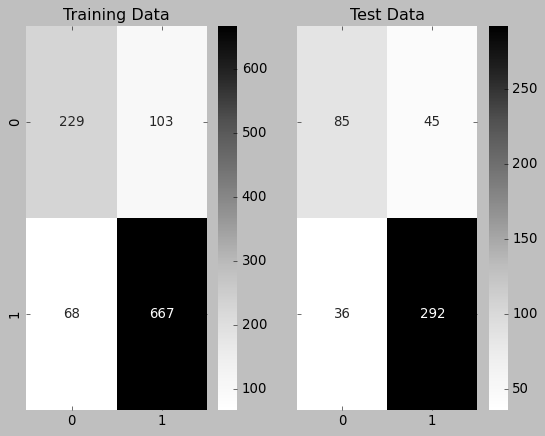

In [352]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [353]:
## Performance Matrix on test data set
y_test_predict = LR.predict(X_test)
model_score = LR.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8231441048034934
[[ 85  45]
 [ 36 292]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [354]:
# Training Data Probability Prediction
pred_prob_train = LR.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = LR.predict_proba(X_test)

AUC for the Training Data: 0.889
AUC for the Test Data: 0.883


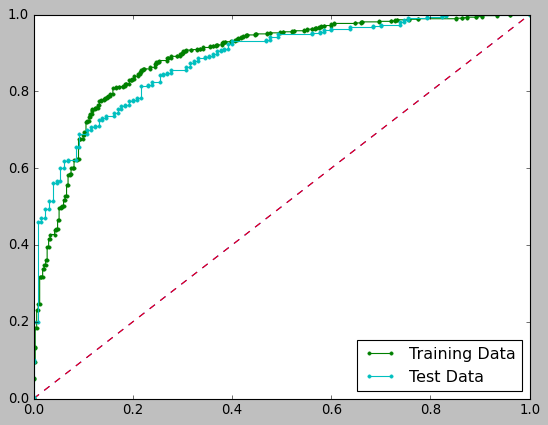

In [355]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [356]:
# LogisticRegression Parameters tunning 
LRM = LogisticRegression()

## Search grid for optimal parameters
lr_param_grid = {"penalty" : ["l2"],
              "tol" : [0.0001,0.0002,0.0003],
              "max_iter": [100,200,300],
              "C" :[0.01, 0.1, 1, 10, 100],
              "intercept_scaling": [1, 2, 3, 4],
              "solver":['liblinear'],
              "verbose":[1]}


gsLRM = GridSearchCV(LRM, param_grid = lr_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLRM.fit(X_train,y_train)
LRM_best = gsLRM.best_estimator_

# Best score
gsLRM.best_score_

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
[LibLinear]

0.832304708164345

# Linear Discriminant Analysis

In [357]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [358]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8369259606373008
[[233  99]
 [ 75 660]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



In [359]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8187772925764192
[[ 86  44]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



In [362]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = LDA_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = LDA_model.predict(X_test)

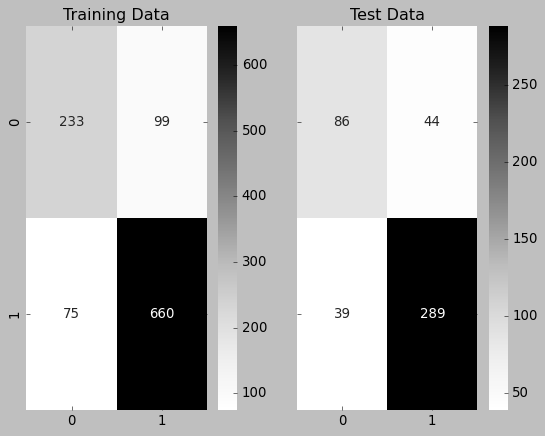

In [363]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [367]:
# Training Data Probability Prediction
pred_prob_train = LDA_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = LDA_model.predict_proba(X_test)

AUC for the Training Data: 0.889
AUC for the Test Data: 0.884


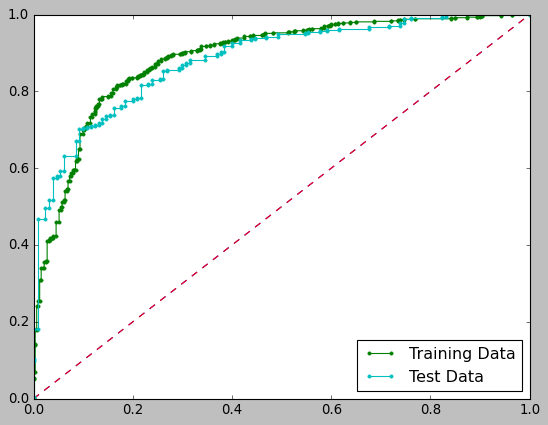

In [368]:
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

Grid Search in LDA

In [360]:
# Linear Discriminant Analysis - Parameter Tuning
LDA = LinearDiscriminantAnalysis()

## Search grid for optimal parameters
lda_param_grid = {"solver" : ["svd"],
              "tol" : [0.0001,0.0002,0.0003]}


gsLDA = GridSearchCV(LDA, param_grid = lda_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLDA.fit(X_train,y_train)
LDA_best = gsLDA.best_estimator_

# Best score
gsLDA.best_score_

Fitting 10 folds for each of 3 candidates, totalling 30 fits


0.8313524951507671

# Ada Boost

In [369]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [370]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8472352389878163
[[238  94]
 [ 69 666]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



In [371]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8187772925764192
[[ 90  40]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



In [467]:
# Training Data Probability Prediction
pred_prob_train = ADB_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = ADB_model.predict_proba(X_test)

AUC for the Training Data: 0.913
AUC for the Test Data: 0.879


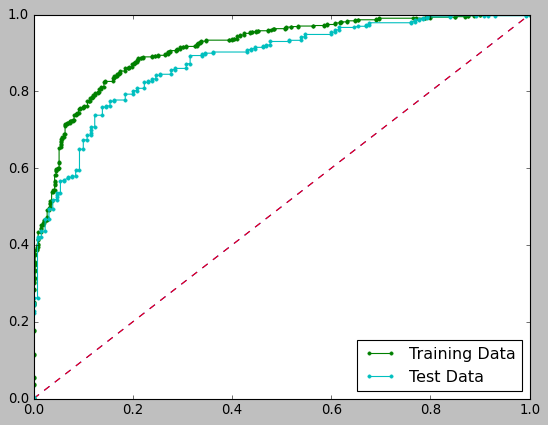

In [468]:
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [372]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# define the model with default hyperparameters
model = AdaBoostClassifier()

# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

# execute the grid search
grid_result = grid_search.fit(X, y)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.831056 using {'learning_rate': 1.0, 'n_estimators': 10}
0.737063 (0.037958) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.737063 (0.037958) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.737063 (0.037958) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.738152 (0.039547) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.737063 (0.037958) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.738152 (0.039547) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.747983 (0.050216) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.788426 (0.024083) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.749080 (0.051594) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.788426 (0.024083) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.790177 (0.023520) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.815977 (0.025942) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.790177 (0.023520) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.817071 

# Gradient Boosting

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [67]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8865979381443299
[[262  70]
 [ 51 684]]
              precision    recall  f1-score   support

Conservative       0.84      0.79      0.81       332
      Labour       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



In [68]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8318777292576419
[[ 96  34]
 [ 43 285]]
              precision    recall  f1-score   support

Conservative       0.69      0.74      0.71       130
      Labour       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



In [382]:
# Training Data Probability Prediction
pred_prob_train = gbcl.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = gbcl.predict_proba(X_test)

AUC for the Training Data: 0.944
AUC for the Test Data: 0.904


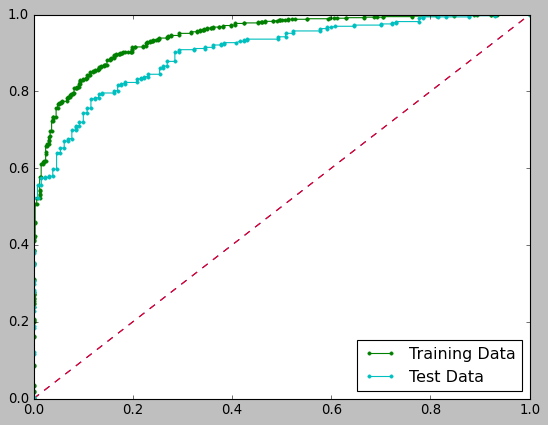

In [383]:
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [384]:
from sklearn.model_selection import StratifiedKFold
# Cross validate model with Kfold stratified cross val
K_fold = StratifiedKFold(n_splits=10)

# Gradient boosting tunning
GBC = GradientBoostingClassifier()
gb_param_grid = {
              'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01, 0.001],
              'max_depth': [4, 8,16],
              'min_samples_leaf': [100,150,250],
              'max_features': [0.3, 0.1]
              }

gsGBC = GridSearchCV(GBC, param_grid = gb_param_grid, cv=K_fold, 
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


0.8388379474519484

# KNN Model

In [385]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [387]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8612933458294283
[[246  86]
 [ 62 673]]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       332
           1       0.89      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.83      1067
weighted avg       0.86      0.86      0.86      1067



In [388]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7860262008733624
[[ 81  49]
 [ 49 279]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       130
           1       0.85      0.85      0.85       328

    accuracy                           0.79       458
   macro avg       0.74      0.74      0.74       458
weighted avg       0.79      0.79      0.79       458



In [389]:
# Training Data Probability Prediction
pred_prob_train = KNN_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = KNN_model.predict_proba(X_test)

AUC for the Training Data: 0.924
AUC for the Test Data: 0.832


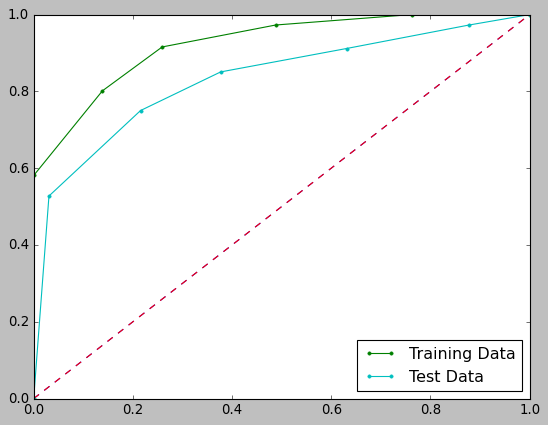

In [390]:
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [391]:
from sklearn.model_selection import GridSearchCV
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
k_range = list(range(1, 31))
print(k_range)
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)
# instantiate the grid
grid = GridSearchCV(KNN_model, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
grid.fit(X_train,y_train)
knn_best= grid.best_estimator_

grid.best_score_



[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


0.8107652971257273

# Decision Tree

In [392]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [393]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990627928772259
[[332   0]
 [  1 734]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [394]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.74235807860262
[[ 80  50]
 [ 68 260]]
              precision    recall  f1-score   support

           0       0.54      0.62      0.58       130
           1       0.84      0.79      0.82       328

    accuracy                           0.74       458
   macro avg       0.69      0.70      0.70       458
weighted avg       0.75      0.74      0.75       458



In [410]:
# Training Data Probability Prediction
pred_prob_train = DT_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = DT_model.predict_proba(X_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.704


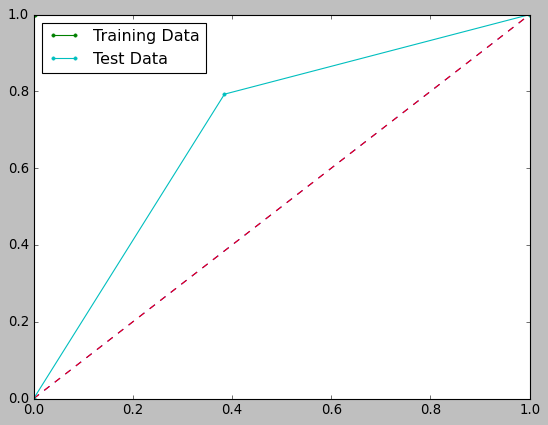

In [411]:
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [397]:
    from sklearn import decomposition, datasets
    from sklearn import tree
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import GridSearchCV
    from sklearn.preprocessing import StandardScaler
    
    std_slc = StandardScaler()
    pca = decomposition.PCA()   
    dec_tree = tree.DecisionTreeClassifier()
    pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])
    
    n_components = list(range(1,X.shape[1]+1,1))
    criterion = ['gini', 'entropy']
    max_depth = [2,4,6,8,10,12]
    
    parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)
    
    clf_GS = GridSearchCV(pipe, parameters)
    clf_GS.fit(X, y)
    
    print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
    print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
    print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
    print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])
    
    clf_GS.best_score_
    

Best Criterion: entropy
Best max_depth: 6
Best Number Of Components: 4

DecisionTreeClassifier(criterion='entropy', max_depth=6)


0.8072131147540983

# Random Forest

In [398]:

from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [399]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990627928772259
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [400]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8209606986899564
[[ 90  40]
 [ 42 286]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



In [412]:
# Training Data Probability Prediction
pred_prob_train = RF_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = RF_model.predict_proba(X_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.887


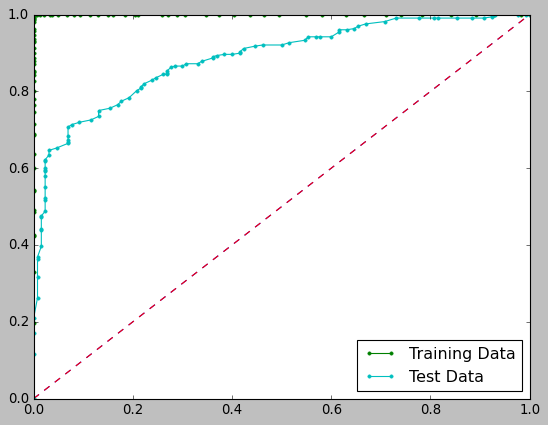

In [413]:
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [403]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC, param_grid = rf_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


0.832269441015694

# Bagging with Random Forest

In [404]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
cart = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [405]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9653233364573571
[[304  28]
 [  9 726]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       332
           1       0.96      0.99      0.98       735

    accuracy                           0.97      1067
   macro avg       0.97      0.95      0.96      1067
weighted avg       0.97      0.97      0.97      1067



In [407]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8362445414847162
[[ 92  38]
 [ 37 291]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       130
           1       0.88      0.89      0.89       328

    accuracy                           0.84       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458



In [414]:
# Training Data Probability Prediction
pred_prob_train = Bagging_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = Bagging_model.predict_proba(X_test)

AUC for the Training Data: 0.997
AUC for the Test Data: 0.897


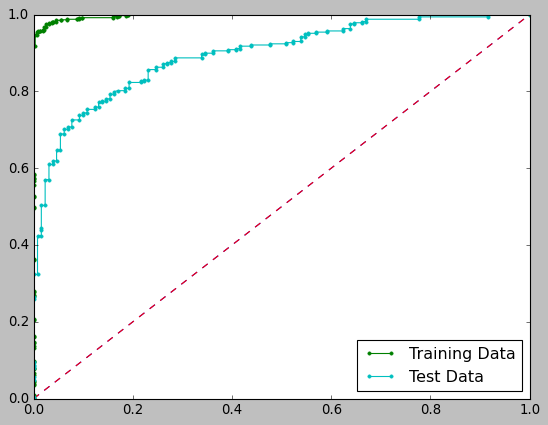

In [415]:
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# Comparision of Different models with train dataset

Naive Bayes Model

The Recall value of Naive Bayes Model suggest that Labour is having 0.88

Linear Discriminate analysis

The Recall value of Linear Discriminate Analysis suggests that Labour is having 0.90

Ada Boost 

The Recall value of Ada Boost Suggests that Labour is 0.91

Gradient Boosting

The Recall Value of Gradient Boosting suggests that Labour is 0.91

KNN Model

The KNN Model suggests that Labour is 0.92

Decision Tree 

The Decision Tree Suggests Both the Parties have 1.00

Random Forest

The Random Forest suggests both the Parties have 1.00

Bagging with Random Forest

The Bagging suggests that the Labour is having 0.99

worst performing Model - Naive Bayes 
Best performing Model - Decision Tree and Random Forest.

Comparision of different models on Test data Set

Naive Bayes Model

The Naive bayes Model suggests that Labour has 0.87 

Linear Discriminate Analysis

The Linear Discriminate Analysis suggest that Labour has 0.88 

Ada Boost

The Ada Boost suggest that Labour has 0.87

Gradient Boosting

The Gradient Boosting suggest that labour has 0.87

KNN Model

The KNN Model suggests that labour 0.85

Decision Tree

The Decision Tree suggests that labour has 0.80 

Random Forest

The Random Forest suggests that labour has 0.87

Bagging with the Random Forset

The Bagging with the Random Forest suggests that labour has 0.89 

Model which have not performed well on the train data set , also have not performed well on the test data set However Decision Tree and Random Forest which had a 100% score on the train data set have shown a poor result on the test data set . Hence a clear case of overfitting.

# Conclusion

So we will select models which have performed approximately similar on the train and test data set and apply smote on the same to check if the performance has improved or not i.e. Naive Bayes, LDA and ADA

# SMOTE

In [75]:
 !pip install imbalanced-learn

In [418]:
from imblearn.over_sampling import SMOTE

SMOTE is applied only on Train Dataset

In [419]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [420]:
## Let's check the shape after SMOTE
X_train_res.shape


(1470, 8)

# Naive Bayes with SMOTE

In [421]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [422]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [423]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.8340136054421768
[[602 133]
 [111 624]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       735
           1       0.82      0.85      0.84       735

    accuracy                           0.83      1470
   macro avg       0.83      0.83      0.83      1470
weighted avg       0.83      0.83      0.83      1470



In [424]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8013100436681223
[[102  28]
 [ 63 265]]
              precision    recall  f1-score   support

           0       0.62      0.78      0.69       130
           1       0.90      0.81      0.85       328

    accuracy                           0.80       458
   macro avg       0.76      0.80      0.77       458
weighted avg       0.82      0.80      0.81       458



# LDA With SMOTE

In [427]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_SM_model= LinearDiscriminantAnalysis()
LDA_SM_model.fit(X_train_res,y_train_res)

LinearDiscriminantAnalysis()

In [428]:
## Performance Matrix on train data set
y_train_predict = LDA_SM_model.predict(X_train_res)
model_score = LDA_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8231292517006803
[[602 133]
 [127 608]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       735
           1       0.82      0.83      0.82       735

    accuracy                           0.82      1470
   macro avg       0.82      0.82      0.82      1470
weighted avg       0.82      0.82      0.82      1470



In [429]:
## Performance Matrix on test data set
y_test_predict = LDA_SM_model.predict(X_test)
model_score = LDA_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8056768558951966
[[102  28]
 [ 61 267]]
              precision    recall  f1-score   support

           0       0.63      0.78      0.70       130
           1       0.91      0.81      0.86       328

    accuracy                           0.81       458
   macro avg       0.77      0.80      0.78       458
weighted avg       0.83      0.81      0.81       458



# ADA Boost with SMOTE

In [434]:
from sklearn.ensemble import AdaBoostClassifier
ADA_SM_model=  AdaBoostClassifier(n_estimators=100,random_state=1)
ADA_SM_model.fit(X_train_res,y_train_res)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [435]:
## Performance Matrix on train data set
y_train_predict = ADA_SM_model.predict(X_train_res)
model_score = ADA_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8802721088435375
[[646  89]
 [ 87 648]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       735
           1       0.88      0.88      0.88       735

    accuracy                           0.88      1470
   macro avg       0.88      0.88      0.88      1470
weighted avg       0.88      0.88      0.88      1470



In [436]:
## Performance Matrix on test data set
y_test_predict = ADA_SM_model.predict(X_test)
model_score = ADA_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8209606986899564
[[ 98  32]
 [ 50 278]]
              precision    recall  f1-score   support

           0       0.66      0.75      0.71       130
           1       0.90      0.85      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.80      0.79       458
weighted avg       0.83      0.82      0.82       458



# Conclusion after SMOTE

Recall values after SMOTE for the Naive Bayes, LDA, ADA Boost SUggest that the Labour is having slight higher chance of winning the elections. 

# Text Analysis of President Inaugural Speeches

In [437]:
import numpy as np
import pandas as pd
import re
import random
import string # this is used for string manipulations
import nltk
import matplotlib.pyplot as plt
import matplotlib
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
data1=inaugural.raw('1941-Roosevelt.txt')
data2=inaugural.raw('1961-Kennedy.txt')
data3=inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\rjana\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [438]:
len(inaugural.fileids())

59

President Roosevelt

In [439]:
data1=inaugural.raw('1941-Roosevelt.txt')
data1

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [440]:
inaugural.words('1941-Roosevelt.txt')

['On', 'each', 'national', 'day', 'of', 'inauguration', ...]

Number of Words before removing Stop Words

In [441]:
len(inaugural.words('1941-Roosevelt.txt'))

1536

In [442]:
nltk.FreqDist(inaugural.words('1941-Roosevelt.txt')).most_common(10)

[('the', 104),
 ('of', 81),
 (',', 77),
 ('.', 67),
 ('and', 44),
 ('to', 35),
 ('in', 30),
 ('a', 29),
 ('--', 25),
 ('is', 24)]

In [443]:
# Defining a variable 'stopwords' which contains the list of punctuations from the string library and the english stopwords
# from nltk
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

# Converting all the words to lower case
all_words = (w.lower() for w in inaugural.words('1941-Roosevelt.txt')) 
# Only keeping the words which are not the 'stopwords'
all_words_clean = [word for word in all_words if word not in stopwords]


# Creating a frequency distribution of the lower case words which does not contain any stopwords
all_words_freq = nltk.FreqDist(all_words_clean)

# Extracting the  most common 2000 words after the list of words have been converted to lowercase and the stopwords 
word_features = [item[0] for item in all_words_freq.most_common(2000)]

After removing Stop words

In [445]:
len(word_features) # looking at first 5 word_features

425

In [446]:
nltk.FreqDist(word_features).most_common(10)

[('--', 1),
 ('nation', 1),
 ('know', 1),
 ('spirit', 1),
 ('life', 1),
 ('democracy', 1),
 ('us', 1),
 ('people', 1),
 ('america', 1),
 ('years', 1)]

In [447]:
#WordCloud for Roosevelt Speech

wc_a = ' '.join(all_words_clean)

Word Cloud for Roosevelt Speech (after cleaning)!!


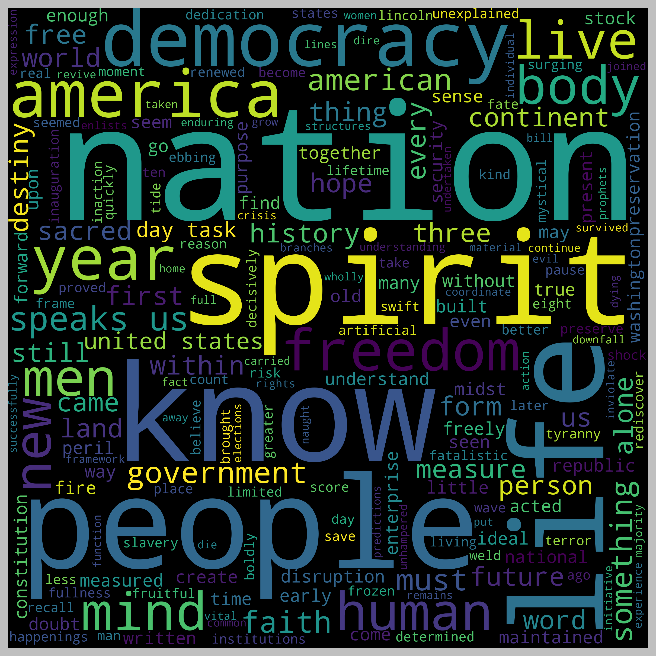

In [448]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Roosevelt Speech (after cleaning)!!")
plt.show()

# President Kennedy

In [449]:
data2=inaugural.raw('1961-Kennedy.txt')
data2

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [450]:
inaugural.words('1961-Kennedy.txt')

['Vice', 'President', 'Johnson', ',', 'Mr', '.', ...]

In [451]:
len(inaugural.words('1961-Kennedy.txt'))

1546

In [452]:
nltk.FreqDist(inaugural.words('1961-Kennedy.txt')).most_common(10)

[(',', 85),
 ('the', 83),
 ('of', 65),
 ('.', 51),
 ('to', 38),
 ('and', 37),
 ('a', 29),
 ('we', 27),
 ('--', 25),
 ('in', 24)]

In [453]:
# Defining a variable 'stopwords' which contains the list of punctuations from the string library and the english stopwords
# from nltk
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

# Converting all the words to lower case
all_words = (w.lower() for w in inaugural.words('1961-Kennedy.txt')) 
# Only keeping the words which are not the 'stopwords'
all_words_clean = [word for word in all_words if word not in stopwords]


# Creating a frequency distribution of the lower case words which does not contain any stopwords
all_words_freq = nltk.FreqDist(all_words_clean)

# Extracting the  most common 2000 words after the list of words have been converted to lowercase and the stopwords 
word_features = [item[0] for item in all_words_freq.most_common(2000)]

In [454]:
len(word_features) # looking at first 5 word_features

457

In [455]:
nltk.FreqDist(word_features).most_common(10)

[('--', 1),
 ('let', 1),
 ('us', 1),
 ('world', 1),
 ('sides', 1),
 ('new', 1),
 ('pledge', 1),
 ('citizens', 1),
 ('power', 1),
 ('shall', 1)]

In [456]:
#WordCloud for Roosevelt Speech

wc_a = ' '.join(all_words_clean)

Word Cloud for Kennedy Speech (after cleaning)!!


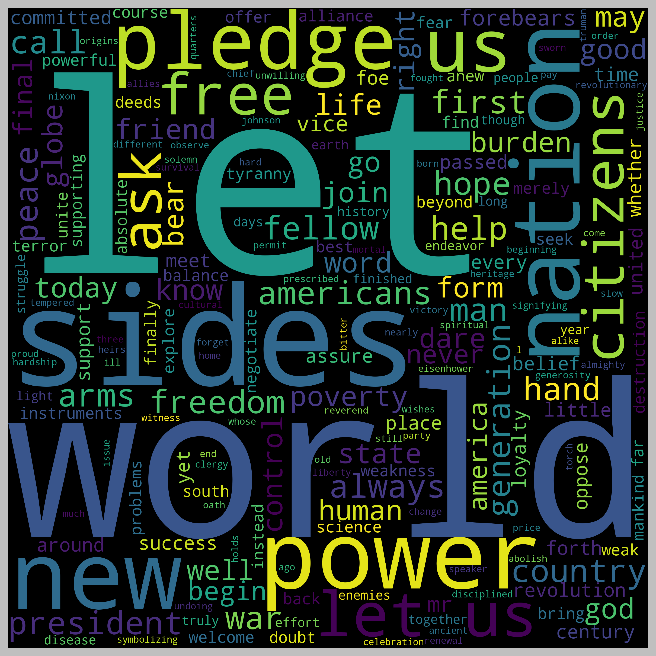

In [457]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Kennedy Speech (after cleaning)!!")
plt.show()

# President Nixon

In [458]:
data3=inaugural.raw('1973-Nixon.txt')
data3

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [459]:
inaugural.words('1973-Nixon.txt')

['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', ...]

In [460]:
len(inaugural.words('1973-Nixon.txt'))

2028

In [461]:
nltk.FreqDist(inaugural.words('1973-Nixon.txt')).most_common(10)

[(',', 96),
 ('the', 80),
 ('.', 68),
 ('of', 68),
 ('to', 65),
 ('in', 54),
 ('and', 47),
 ('we', 38),
 ('a', 34),
 ('that', 32)]

In [462]:
# Defining a variable 'stopwords' which contains the list of punctuations from the string library and the english stopwords
# from nltk
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

# Converting all the words to lower case
all_words = (w.lower() for w in inaugural.words('1973-Nixon.txt')) 
# Only keeping the words which are not the 'stopwords'
all_words_clean = [word for word in all_words if word not in stopwords]


# Creating a frequency distribution of the lower case words which does not contain any stopwords
all_words_freq = nltk.FreqDist(all_words_clean)

# Extracting the  most common 2000 words after the list of words have been converted to lowercase and the stopwords 
word_features = [item[0] for item in all_words_freq.most_common(2000)]

In [463]:
len(word_features) # looking at first 5 word_features

419

In [464]:
nltk.FreqDist(word_features).most_common(10)

[('us', 1),
 ('let', 1),
 ('america', 1),
 ('peace', 1),
 ('world', 1),
 ('--', 1),
 ('new', 1),
 ('nation', 1),
 ('responsibility', 1),
 ('government', 1)]

In [465]:
#WordCloud for Roosevelt Speech

wc_a = ' '.join(all_words_clean)

Word Cloud for Nixon Speech (after cleaning)!!


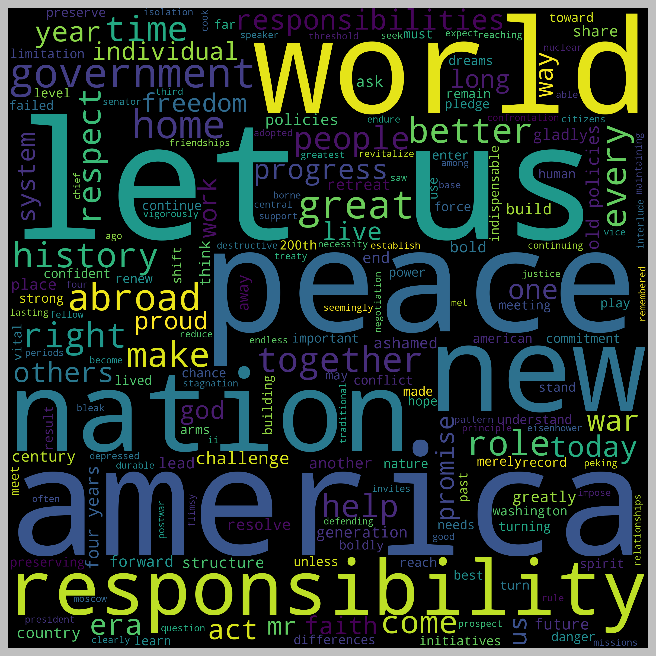

In [466]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Nixon Speech (after cleaning)!!")
plt.show()